In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df = pd.read_csv("all data/citizen/kerala.csv")

#df = df[df["Species_name"] == "Tamarind-Tamarindus indica"]
df = df[df["Species_name"] == "Mango (all varieties)-Mangifera indica"]
df = df[df["Year"] == 2023]
df = df.drop(["Date_of_observation", "Observation_ID", "User_id", "User_Tree_id", "Species_id", "State_name", "Species_name", "Year"], axis=1)
df = df.reset_index(drop=True)

weeks = df["Week"]
df

,Lat,Long,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Week
0,10.77145,76.48380,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,42
1,11.86728,75.37995,2.0,2.0,1.0,1.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,40
2,11.75091,75.49266,1.0,2.0,1.0,2.0,2.0,-2.0,-2.0,2.0,0.0,-2.0,42
3,10.13695,76.52394,2.0,1.0,1.0,1.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,39
4,9.98534,76.77693,2.0,2.0,1.0,1.0,1.0,-2.0,-2.0,2.0,1.0,-2.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,8.80151,76.76254,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,22
6443,8.79411,76.75868,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,22
6444,8.79411,76.75868,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,21
6445,8.80151,76.76254,1.0,2.0,1.0,0.0,0.0,-2.0,-2.0,0.0,0.0,-2.0,21


In [145]:
data = {}

for week in weeks.unique():
    
    # CLUSTERING
    
    print(f"Week {week}")
    week_df = df[df["Week"] == week]
    
    week_df = week_df.drop("Week", axis=1)
    week_df = week_df.reset_index(drop=True)
    
    km = KMeans(n_clusters=1, random_state=42, n_init="auto")
    
    clusters = km.fit_predict(week_df)


    centroids = km.cluster_centers_

    distances = []

    for i, row in week_df.iterrows():
        cluster_label = clusters[i]
        centroid = centroids[0]
        relevant_values = row.values[:len(row.values)]
        float_centroid = [float(val) for val in centroid[:len(centroid)]]
        distance = np.linalg.norm(relevant_values[:len(relevant_values)] - float_centroid)
        distances.append(distance)
    
    #score = silhouette_score(week_df, clusters, metric='euclidean')
    #sil_score.append(score)
        
    #print("Silhouette score: ", score)
        
    # FILTERING
    
    week_df['Distance_to_Centroid'] = distances
    
    std_dev_dist = week_df['Distance_to_Centroid'].std()
    mean = np.mean(week_df["Distance_to_Centroid"])
    
    valid_data = week_df[(week_df['Distance_to_Centroid'] >= mean - 1*std_dev_dist) & (week_df['Distance_to_Centroid'] <= mean + 1*std_dev_dist)]
    
    valid_data = valid_data.reset_index(drop=True)
    clusters2 = km.fit_predict(valid_data)
    
    d = []
    
    centroids = km.cluster_centers_

    for i, row in valid_data.iterrows():
        cluster_label = clusters2[i]
        centroid = centroids[0]
        relevant_values = row.values
        float_centroid = [float(val) for val in centroid]
        distance = np.linalg.norm(relevant_values - float_centroid)
        d.append(distance)
    
    valid_data['Distance_to_Centroid'] = d
    closest_point = valid_data[ valid_data["Distance_to_Centroid"] == min(valid_data['Distance_to_Centroid']) ]
    print(f"Week {week} reference: {closest_point.iloc[0]}")
    
    data[week] = closest_point.iloc[0]
    

Week 42
Week 42 reference: Lat                      9.397710
Long                    76.578530
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              0.000000
Flowers_open             0.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            0.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.230258
Name: 40, dtype: float64
Week 40
Week 40 reference: Lat                      9.397710
Long                    76.578530
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              0.000000
Flowers_open             0.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            0.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.220035
Name: 64, dtype: float64
Week 39
Week

Week 24 reference: Lat                     10.640340
Long                    76.525180
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              0.000000
Flowers_open             0.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            0.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.260797
Name: 53, dtype: float64
Week 23
Week 23 reference: Lat                      9.397710
Long                    76.578530
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              0.000000
Flowers_open             0.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            0.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.197668
Name: 9, dtype: float64
Week 11
Week 11 refer

Week 8 reference: Lat                     10.025260
Long                    76.366000
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              1.000000
Flowers_open             1.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            1.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.333571
Name: 24, dtype: float64
Week 7
Week 7 reference: Lat                     10.120980
Long                    76.396180
Leaves_fresh             1.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              1.000000
Flowers_open             1.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            2.000000
Fruits_ripe              0.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.355752
Name: 29, dtype: float64
Week 6
Week 6 reference

In [69]:
time = np.arange(0, 49)
flowers_bud = []

for key, value in data.items():
    print(f"{key}: {value}")

#for i in range(49):
#    flowers_bud.append(data[i])
#    
#    print(f"Observations in week {i}: ", len(df[df["Week"] == i]))
#
#plt.plot(time, flowers_bud)
#plt.title("Flowers bud, 2023")
#plt.show()

5: Lat                     11.005920
Long                    76.018100
Leaves_fresh             2.000000
Leaves_mature            2.000000
Leaves_old               0.000000
Flowers_bud              1.000000
Flowers_open             1.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            1.000000
Fruits_ripe              1.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.572337
Name: 9, dtype: float64
48: Lat                      9.293040
Long                    76.589120
Leaves_fresh             0.000000
Leaves_mature            2.000000
Leaves_old               1.000000
Flowers_bud              0.000000
Flowers_open             0.000000
Flowers_male            -2.000000
Flowers_Female          -2.000000
Fruits_unripe            0.000000
Fruits_ripe              2.000000
Fruits_open             -2.000000
Distance_to_Centroid     1.537966
Name: 8, dtype: float64
45: Lat                     10.757440
Long                   

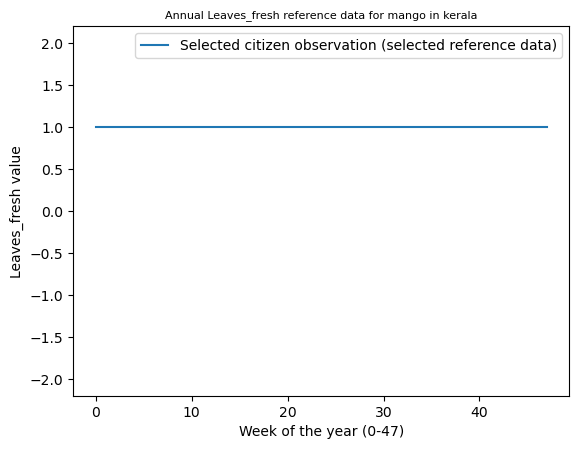

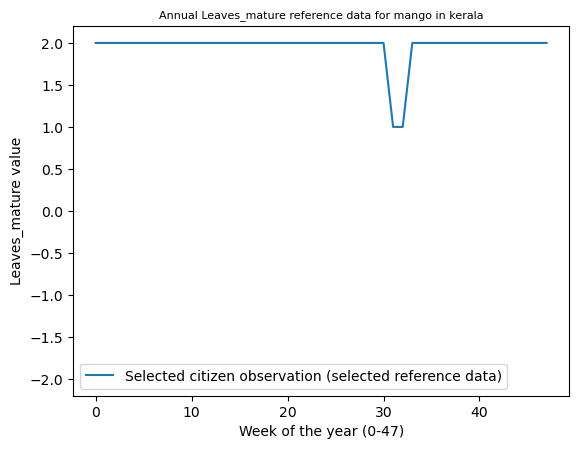

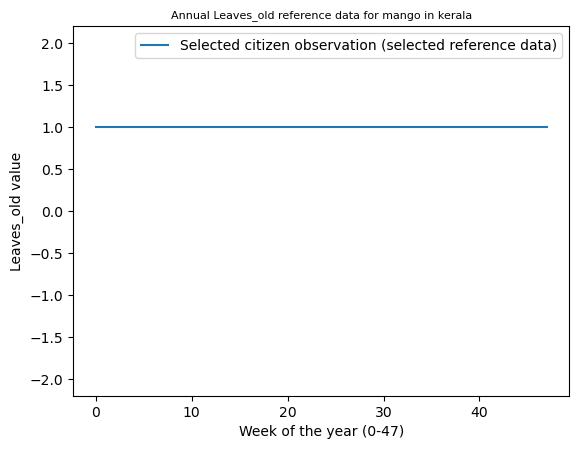

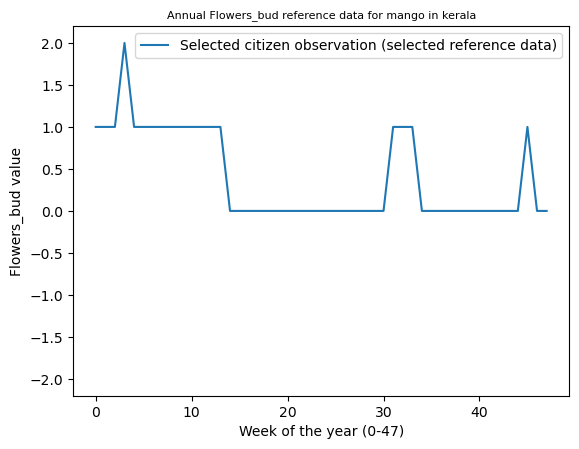

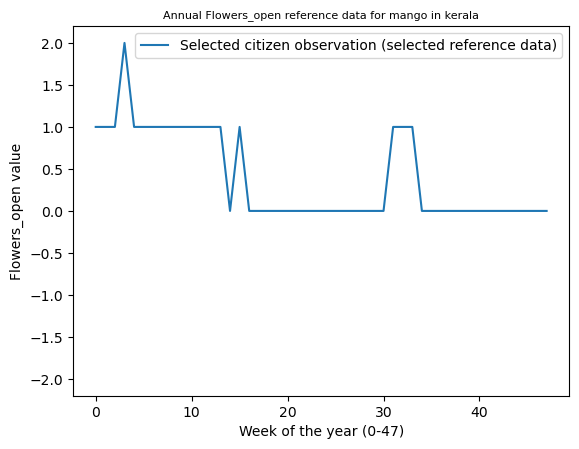

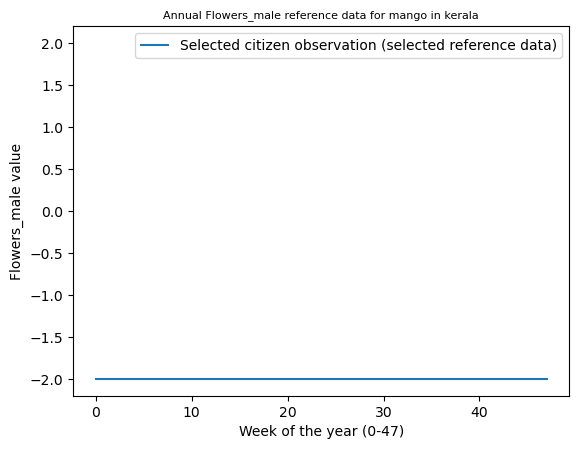

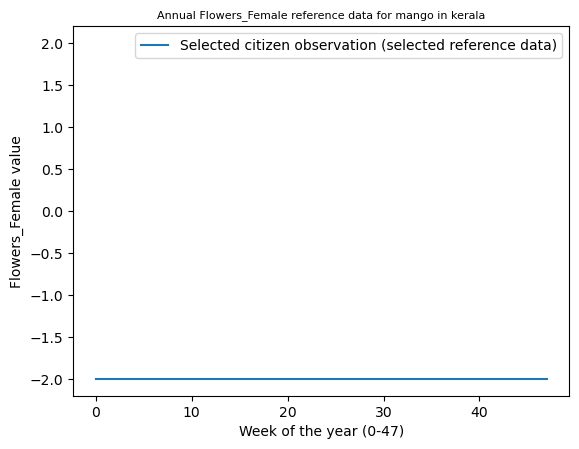

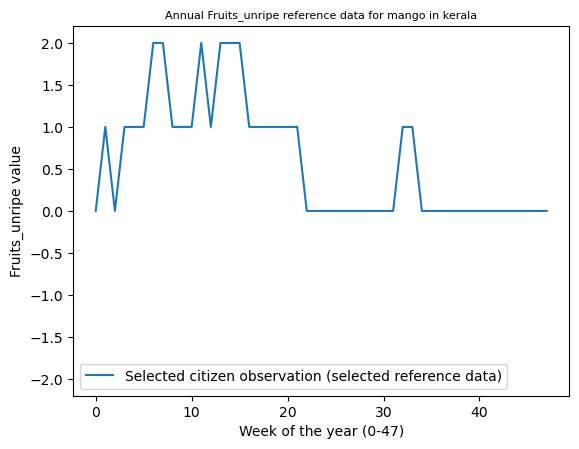

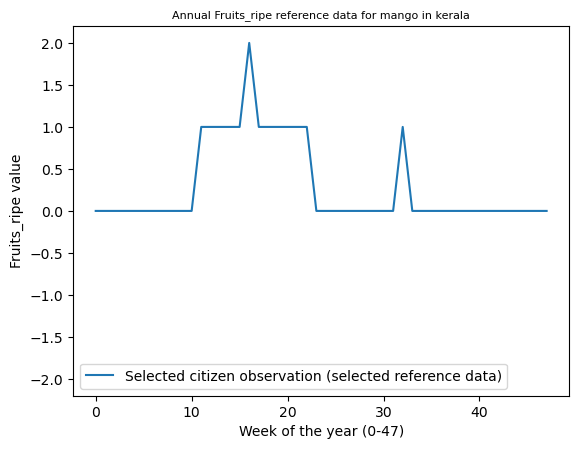

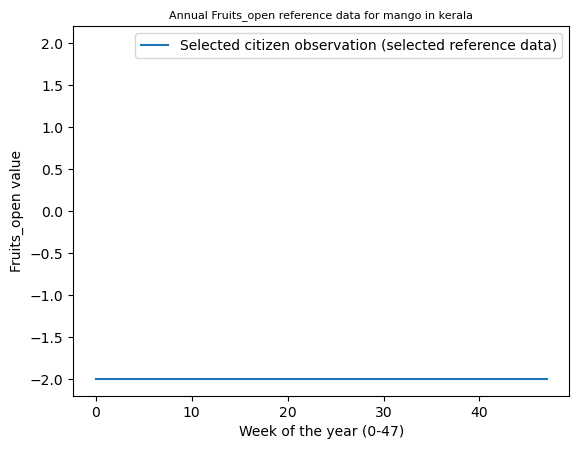

In [146]:
#os.makedirs(f"{plot_path}/{state}", exist_ok=True)

phenophases = ['Leaves_fresh','Leaves_mature','Leaves_old','Flowers_bud','Flowers_open',
               'Flowers_male','Flowers_Female','Fruits_unripe','Fruits_ripe','Fruits_open']
for phenophase in phenophases:
    #os.makedirs(f"{plot_path}/{state}", exist_ok=True)
    x = list(range(48))
    y = [data[week][phenophase] for week in range(48)]

    plt.plot(x, y, label=f'Selected citizen observation (selected reference data)')
    plt.xlabel('Week of the year (0-47)')
    plt.ylabel(f'{phenophase} value')
    plt.ylim(-2.2,2.2)
    #plt.title(f'Annual {phenophase} reference data for {species} in {state}', fontsize=8)
    plt.title(f'Annual {phenophase} reference data for mango in kerala', fontsize=8)
    plt.legend()
    plt.show()
    #plt.savefig(f"{plot_path}/{state}/{species.replace(' ', '').replace('.', '').lower()}_{transition_attr}_{year}")
    #plt.close()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [155]:
if pd.DataFrame():
    print('sd')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

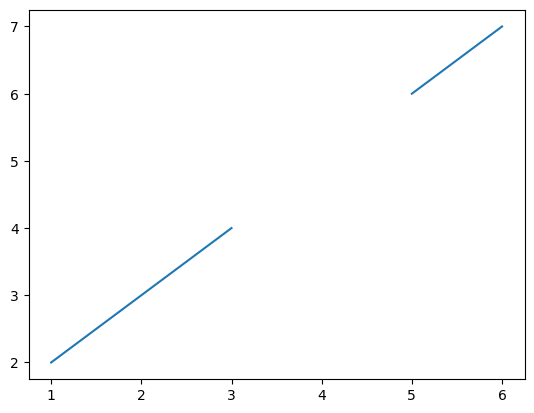

In [160]:
plt.plot([1,2,3,4,5,6],[2,3,4,np.nan,6,7])

In [152]:
def select_reference_data(state, species, year):
    df = pd.read_csv(f"all data/citizen/{state}.csv")
    df = df[df["Species_name"] == species]
    df = df[df["Year"] == int(year)]
    df = df.drop(["Date_of_observation", "Observation_ID", "User_id", "User_Tree_id", "Species_id", "State_name", "Species_name", "Year"], axis=1)
    df = df.reset_index(drop=True)
    for week in df["Week"].sort_values().unique():
        # CLUSTERING
        week_df = df[df["Week"] == week]
        week_df = week_df.drop("Week", axis=1)
        week_df = week_df.reset_index(drop=True)
        
        km = KMeans(n_clusters=1, random_state=42, n_init="auto")
        clusters = km.fit_predict(week_df)
        centroids = km.cluster_centers_
        distances = []
        
        for i, row in week_df.iterrows():
            cluster_label = clusters[i]
            centroid = centroids[0]
            relevant_values = row.values[:len(row.values)]
            float_centroid = [float(val) for val in centroid]
            distance = np.linalg.norm(relevant_values[:len(relevant_values)] - float_centroid)
            distances.append(distance)
        
        # FILTERING
    
        week_df['Distance_to_Centroid'] = distances

        std_dev_dist = week_df['Distance_to_Centroid'].std()
        mean = np.mean(week_df["Distance_to_Centroid"])

        valid_data = week_df[(week_df['Distance_to_Centroid'] >= mean - 1*std_dev_dist) & (week_df['Distance_to_Centroid'] <= mean + 1*std_dev_dist)]
        
        if 
        
        valid_data = valid_data.reset_index(drop=True)
        display(week_df)
        clusters2 = km.fit_predict(valid_data)

        d = []

        centroids = km.cluster_centers_

        for i, row in valid_data.iterrows():
            cluster_label = clusters2[i]
            centroid = centroids[0]
            relevant_values = row.values
            float_centroid = [float(val) for val in centroid]
            distance = np.linalg.norm(relevant_values - float_centroid)
            d.append(distance)

        valid_data['Distance_to_Centroid'] = d
        closest_point = valid_data[ valid_data["Distance_to_Centroid"] == min(valid_data['Distance_to_Centroid']) ]

        data[week] = closest_point.iloc[0]
    new_ref_df = pd.DataFrame(data).T.sort_index()
    new_ref_df.insert(0,"Week",new_ref_df.index)
    return pd.DataFrame(data).T.sort_index()

In [127]:
a = select_reference_data('kerala', 'Tamarind-Tamarindus indica', 2023)

In [143]:
pd.read_csv(f"all data/citizen/delhi.csv")['Species_name'].unique()

array(['Arjun-Terminalia arjuna', 'Babool-Acacia nilotica',
       'Banyan-Ficus benghalensis', 'Champa-Michelia champaca',
       'Chiku Sapodilla-Manilkara zapota\x86',
       'Chinaberry-Melia azedarach', 'Coconut palm-Cocos nucifera',
       'Country Fig-Ficus racemosa',
       'Crepe Jasmine-Tabernaemontana divaricata',
       "Devil's Tree-Alstonia scholaris",
       'Drumstick tree-Moringa oleifera', 'Soft fig-Ficus mollis',
       'Fish-tail Palm-Caryota urens',
       'Flame of the Forest-Butea monosperma',
       'Floss Silk Tree-Ceiba speciosa', 'Frangipani-Plumeria rubra',
       'Guava tree-Psidium guajava', 'Gulmohur-Delonix regia',
       'Indian Cork Tree-Millingtonia hortensis',
       'Indian Mulberry-Morinda pubescens',
       'Indian Coral-Erythrina indica',
       'Indian Elm-Holoptelea integrifolia',
       'Indian Laburnum-Cassia fistula',
       'Indian Rosewood-Dalbergia sissoo',
       'Jacaranda-Jacaranda mimosifolia',
       'Jackfruit-Artocarpus heterophyll

In [153]:
ref_dfs = {}
for filename in os.listdir("all data/reference"):
    ref_dfs[filename.rstrip('.csv')] = pd.read_csv("all data/reference/{}".format(filename)) # !!! CHANGE THIS !!!

plot_path = "plots/selected_reference_data_clustering"
states = [state.replace('.csv','') for state in os.listdir("all data/citizen")]
for state in states:
    #state_ref_df = ref_dfs[state]
    species_in_state = pd.read_csv(f"all data/citizen/{state}.csv")['Species_name'].unique()
    for species in species_in_state:
        #species_ref_df = state_ref_df[state_ref_df['species_name'] == species]
        
        year = 2023 # !!! Do some stuff with years here (e.g. iterating over years and finding medin) !!!
        
        species_ref_df = select_reference_data(state, species, year)
        if !species_ref_df:
            continue
        
        #os.makedirs(f"{plot_path}/{state}/{species.replace(' ', '').replace('.', '').lower()}", exist_ok=True)
        
        phenophases = ['Leaves_fresh','Leaves_mature','Leaves_old','Flowers_bud','Flowers_open',
                       'Flowers_male','Flowers_Female','Fruits_unripe','Fruits_ripe','Fruits_open']
        for phenophase in phenophases:
            x = list(range(48))
            y = species_ref_df[phenophase]
            
            plt.plot(x, y, label=f'Selected citizen observation (selected reference data)')
            plt.xlabel('Week of the year (0-47)')
            plt.ylabel(f'{phenophase} value')
            plt.title(f'Annual {phenophase} reference data for {species} in {state}', fontsize=8)
            plt.legend()
            plt.show()
            #plt.savefig(f"{plot_path}/{state}/{species.replace(' ', '').replace('.', '').lower()}")
            #plt.close()
        break
    break

,Lat,Long,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Flowers_male,Flowers_Female,Fruits_unripe,Fruits_ripe,Fruits_open,Distance_to_Centroid
0,11.01709,77.01852,1.0,2.0,1.0,1.0,1.0,-2.0,-2.0,2.0,-1.0,1.0,0.0


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required by KMeans.